Epoch:  0 loss:  69.28149891478226
Epoch:  10 loss:  20.195942183784034
Epoch:  20 loss:  17.29188212332515
Epoch:  30 loss:  16.27032969518502
Epoch:  40 loss:  15.929346856849405
Epoch:  50 loss:  15.813765359936212
Epoch:  60 loss:  15.773548359618657
Epoch:  70 loss:  15.75926845002957
Epoch:  80 loss:  15.754129007313399
Epoch:  90 loss:  15.752263331840698
Epoch:  100 loss:  15.751582448765934
Epoch:  110 loss:  15.751333142903817
Epoch:  120 loss:  15.75124167632901
Epoch:  130 loss:  15.751208077635248
Epoch:  140 loss:  15.751195726560493
Epoch:  150 loss:  15.751191184185544
Epoch:  160 loss:  15.75118951317134
Epoch:  170 loss:  15.751188898349202
Epoch:  180 loss:  15.751188672112704
Epoch:  190 loss:  15.751188588859215
Epoch:  200 loss:  15.751188558221365
Epoch:  210 loss:  15.751188546946171
Epoch:  220 loss:  15.751188542796676
Epoch:  230 loss:  15.75118854126956
Epoch:  240 loss:  15.751188540707545
Epoch:  250 loss:  15.75118854050071
Epoch:  260 loss:  15.751188540

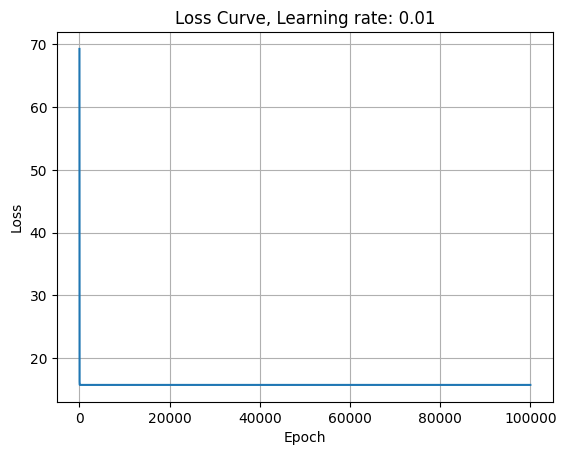

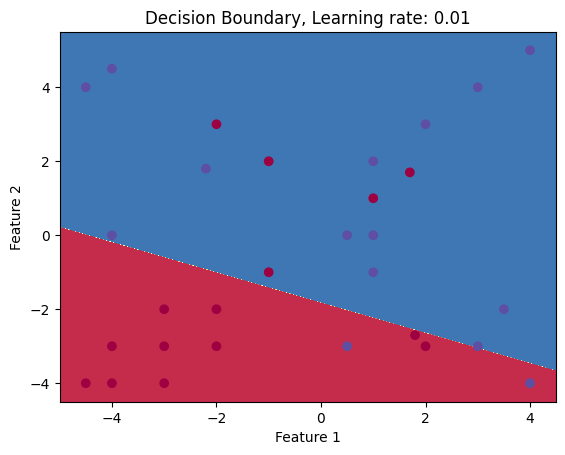

Confusion Matrix:
[[10  5]
 [ 2 13]]
Precision: 0.7222222222222222
Recall: 0.8666666666666667
F1 Score: 0.7878787878787877


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
class LogisticRegression:
    def __init__(self, learning_rate=0.4, num_iterations=100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.X=None

    def preprocess(self, X):
        self.X=np.insert(X, 0, 1, axis=1)
        np.random.seed(0)
        self.w=np.random.randn(self.X.shape[1],1)
        return self.X
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self,Y):
        self.Y=Y
        # self.preprocess(X)
        z=np.dot(self.X,self.w)
        loss=np.sum(Y*z)+np.sum(np.log(1+np.exp(-z)))
        return loss

    def gradient(self,Y):
        # self.preprocess(X)
        z=np.dot(self.X,self.w)
        P=1/(1+np.exp(z))
        gradient=np.dot(self.X.T,Y-P)
        return gradient
    
    def fit(self, X, Y):
        losses=[]
        self.X=self.preprocess(X)
        for i in range(self.num_iterations+1):
            if i%10==0:
                print("Epoch: ",i,"loss: ", self.loss(Y))
                losses.append(self.loss(Y))
            self.w=self.w-self.learning_rate*self.gradient(Y)
            if self.loss(Y)<0.1:
                break
        plt.plot(range(0, i+1, 10), losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        title="Loss Curve, Learning rate: "+str(self.learning_rate)
        plt.title(title)
        plt.grid(True)
        plt.show()
        return self.w
    
    def predict(self, X):
        self.X=self.preprocess(X)
        z=np.dot(self.X,self.w)
        P=1/(1+np.exp(-z))
        return np.round(P)
    
    def plot_boundary(self,X,Y):
        x_min, x_max = X[:, 0].min()-0.5 , X[:, 0].max()+0.5 
        y_min, y_max = X[:, 1].min()-0.5 , X[:, 1].max()+0.5
        h = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z=self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z=Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.scatter(X[:,0],X[:,1],c=Y[:,0],cmap=plt.cm.Spectral)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        title="Decision Boundary, Learning rate: "+str(self.learning_rate)
        plt.title(title)
        plt.show()
        
    def score(self, X, Y):
        # Predict the results
        y_pred = m1.predict(X)

        # Calculate the confusion matrix
        conf_matrix = confusion_matrix(Y, y_pred)
        print("Confusion Matrix:")
        print(conf_matrix)

        # Calculate precision
        precision = precision_score(Y, y_pred)
        print("Precision:", precision)

        # Calculate recall
        recall = recall_score(Y, y_pred)
        print("Recall:", recall)

        # Calculate F1 score
        f1 = f1_score(Y, y_pred)
        print("F1 Score:", f1)


# Test the model
if __name__ == "__main__":
    m1 = LogisticRegression(learning_rate=0.01, num_iterations=100000)
    np.random.seed(0)
    X = np.random.rand(100, 2)  # 100 data points with 2 features
    Y = (X[:, 0] + 2 * X[:, 1] > 1).astype(int)  # Generate binary labels
    
    Y = Y.reshape(-1, 1)
    red_points=np.array([[-2.2,1.8],[-4,0],[4,-4],[3.5,-2],[3,-3],[0.5,0],[1,0],[3,4],[4,5],[1,2],[2,3],[1,-1],[0.5,-3],[-4,4.5],[-4.5,4],])
    blue_points=np.array([[1.8,-2.7],[2,-3],[1.7,1.7],[-2,-3],[-1,-1],[-2,3],[-1,2],[-4,-4],[-4.5,-4],[-3,-4],[-4,-3],[-3,-3],[-3,-2],[-2,-2],[1,1]])
    input_data = np.vstack((red_points, blue_points))
    output_data = np.vstack((np.ones((red_points.shape[0], 1)), np.zeros((blue_points.shape[0], 1)))).reshape(30,1)
    
    m1.fit(input_data, output_data)
    m1.plot_boundary(input_data, output_data)
    m1.score(input_data, output_data)